In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics import tsaplots

In [2]:
### Setup linear response model

def Sys(eigen):
    N = np.random.lognormal(0, 0.01, 10000)
    x = np.ones(N.size)
    xs = 1 #steady state
    x[0]=xs
    for i in range(1,x.size):
        x[i]=N[i]*(x[i-1]+eigen*(xs-x[i-1]))
    plt.plot(x, label='λ='+str(eigen))
    plt.axhline(y = 1, color = 'r', linestyle = '-')
    plt.xlabel("Time")
    plt.ylabel("X(T)")
    plt.legend()
    #plt.title("Local Dynamics, λ="+str(eigen))

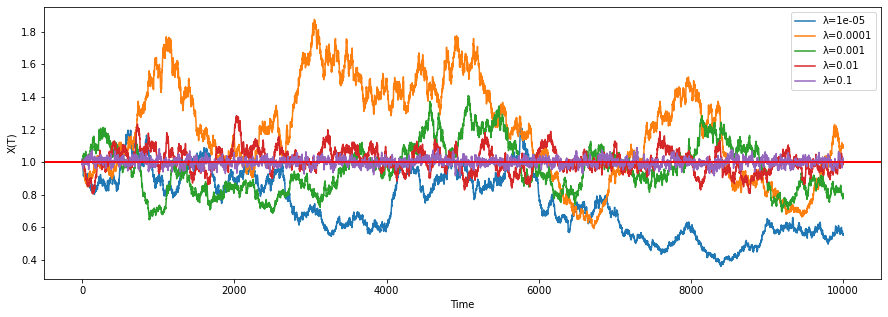

In [57]:
#eigenvalues = [0.1, 0.01, 0.001, 0.0001, 0.00001]
#plot linear response at each eigenvalue

eigenvalues = [0.00001, 0.0001, 0.001, 0.01, 0.1]
fig = plt.figure(figsize=(15,5))
for i in eigenvalues:
    Sys(i)

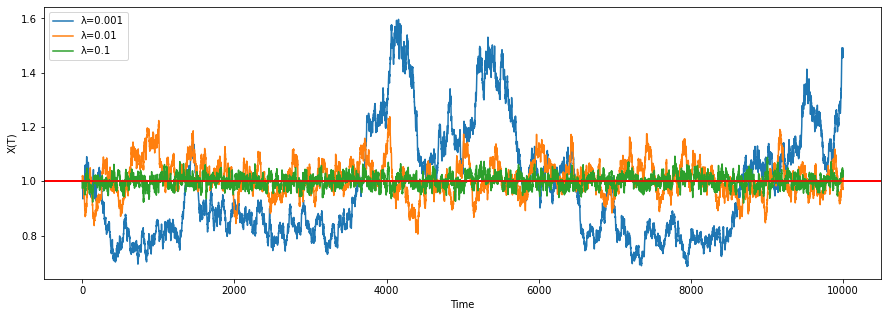

In [58]:
fig = plt.figure(figsize=(15,5))
Sys(0.001)
Sys(0.01)
Sys(0.1)


In [59]:
#####Investigating Increased Variance and Increased Standard Deviation#######


xs = 1
eigen = 0.1

V = [] #variance
S = [] #standard deviation
R = [] #eigenvalues values

while eigen > 0.00001:
    P = []
    M = []
    P.append(1)
    N = np.random.lognormal(0, 0.01, 1000000)
    i = 0
    while (i < 5000):
        P.append(N[i]*(P[i]+eigen*(xs-P[i])))
        i += 1
    # transform output into a pandas-series for applying rolling window to it
    ppp = pd.Series(P[1000:2000])
    M.append(ppp.rolling(20).mean()) #(ppp.values, ws, min_periods=1))
    V.append(np.var(M[0]))
    S.append(np.std(M[0]))
    R.append(eigen)
    eigen -= 0.0005



In [60]:
x = range(len(V))
fitv = np.polyfit(x,V,1)
fitv_fn = np.poly1d(fitv) # takes x and returns an estimate for y
xx = range(len(S))
fits = np.polyfit(xx,S,1)
fits_fn = np.poly1d(fits) # takes x and returns an estimate for y

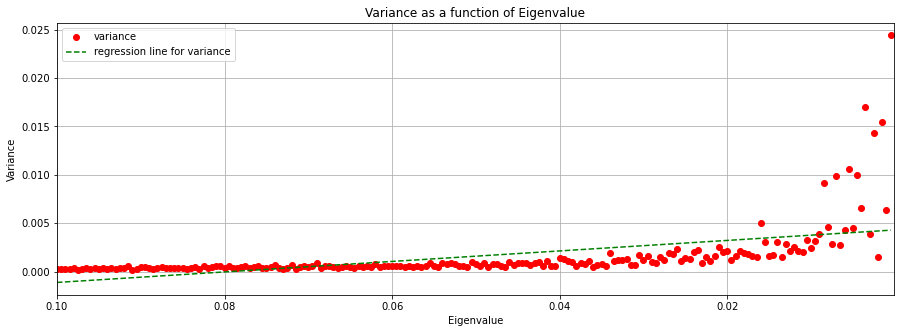

In [61]:
## Plotting Increasing Variance

plt.figure(figsize=(15,5))
plt.plot(R, V, 'ro', label='variance')
plt.xlim(0.1, 0.0001)
plt.plot(R, fitv_fn(x), 'g--', label='regression line for variance')
plt.legend(loc='upper left')
plt.xlabel('Eigenvalue')
plt.ylabel('Variance')
plt.grid()
plt.title('Variance as a function of Eigenvalue')
plt.show()

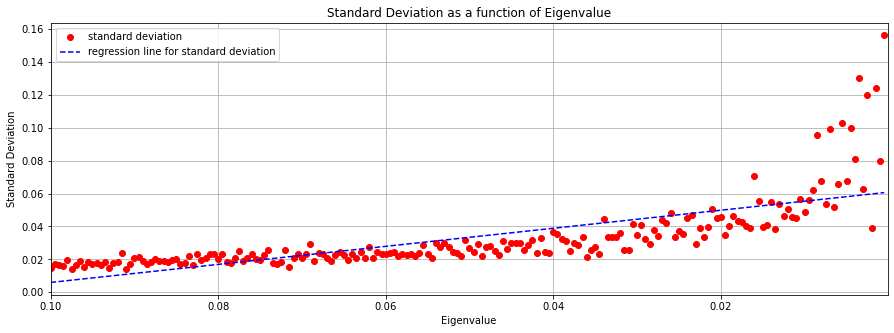

In [62]:
## Plotting Increasing STD

plt.figure(figsize=(15,5))
plt.plot(R, S, 'ro', label='standard deviation')
plt.xlim(0.1, 0.0001)
plt.plot(R, fits_fn(x), 'b--', label='regression line for standard deviation')
plt.legend(loc='upper left')
plt.xlabel('Eigenvalue')
plt.ylabel('Standard Deviation')
plt.grid()
plt.title('Standard Deviation as a function of Eigenvalue')
plt.show()

In [38]:
## Investigating the effect of given eigenvalue on lag-1 autocorrelation

###Calculate lag-1 autocorrelation given eigenvalue

def Autocorrelator(eigen):
    N = np.random.lognormal(0, 0.01, 1000000)
    x = np.ones(N.size)
    xs = 1
    x[0]=xs
    for i in range(1,x.size):
    #Standard formulation Noise
        x[i]=N[i]*(x[i-1]+eigen*(xs-x[i-1]))
    s = pd.Series(x)
    b = s.autocorr(lag=1)
    return b

In [40]:
###Calculate lag-1 autocorrelation as a function of eigenvalue Plots: gamma vs r1 ###

A = []
eigen = 0.1
R = []

while eigen > 0.00001:
    N = np.random.lognormal(0, 0.01, 1000000)
    x = np.ones(N.size)
    xs = 1
    x[0]=xs
    for i in range(1,x.size):
    #Standard formulation Noise
        x[i]=N[i]*(x[i-1]+eigen*(xs-x[i-1]))
    s = pd.Series(x)
    b = s.autocorr(lag=1)
    A.append(b)
    R.append(eigen)
    eigen -= 0.01

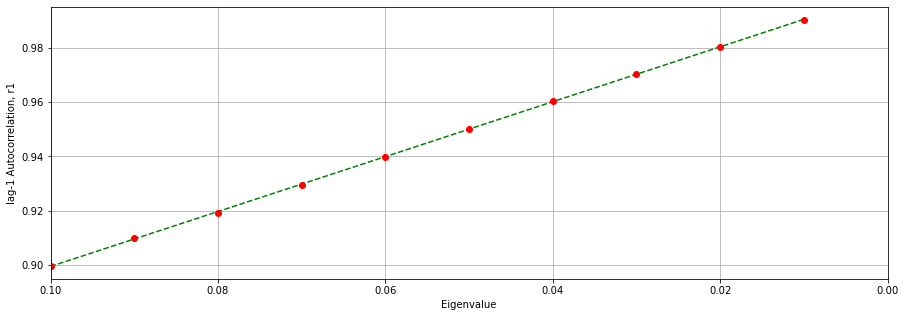

In [42]:
plt.figure(figsize=(15,5))
p = range(len(A))
fita = np.polyfit(R,A,1)
fita_fn = np.poly1d(fita)
plt.plot(R, fita_fn(R), 'g--', label='regression line for autocorrelation')
plt.plot(R, A, 'ro')
plt.xlabel('Eigenvalue')
plt.xlim(0.1, 0)
plt.ylabel('lag-1 Autocorrelation, r1')
plt.grid()

In [46]:
## Plot the autocorrelation function given eigenvalue

def plotter(eigen):
    N = np.random.lognormal(0, 0.01, 1000000)
    x = np.ones(N.size)
    xs = 1
    x[0]=xs
    for i in range(1,x.size):
    #Standard formulation Noise
        x[i]=N[i]*(x[i-1]+eigen*(xs-x[i-1]))
    fig = tsaplots.plot_acf(x, lags=10)
    plt.show()

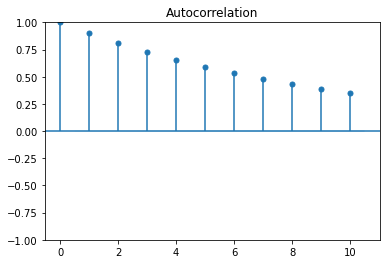

In [47]:
plotter(0.1) #plot autocorrelation function given eigenvalue = 0.1